In [13]:
import numpy as np
import matplotlib.pyplot as plt

In [14]:
class MultiModel():
    def __init__(self, data_path):
        self.data = np.load(data_path)
        
        self.data_u = self.data[0:8:2]
        self.data_v = self.data[1:9:2]
        self.u_t = self.data[8]
        self.v_t = self.data[9]

        self.u_avg = np.mean(self.data_u, axis=0)
        self.v_avg = np.mean(self.data_v, axis=0)
        
        self.u_res = np.abs(np.repeat(self.u_avg[np.newaxis, :, :], 4, 0) - self.data_u)
        self.v_res = np.abs(np.repeat(self.v_avg[np.newaxis, :, :], 4, 0) - self.data_v)
        
    def std(self):
        sigma_u = np.sqrt(
            (np.square(self.u_res[0]) + np.square(self.u_res[1]) + np.square(self.u_res[2]) + np.square(self.u_res[3])) / 3
        )
        sigma_v = np.sqrt(
            (np.square(self.v_res[0]) + np.square(self.v_res[1]) + np.square(self.v_res[2]) + np.square(self.v_res[3])) / 3
        )
        return sigma_u, sigma_v
    
    def std_truth(self):
        u_res_truth = np.abs(np.repeat(self.u_t[np.newaxis, :, :], 4, 0) - self.data_u)
        v_res_truth = np.abs(np.repeat(self.v_t[np.newaxis, :, :], 4, 0) - self.data_v)
        
        sigma_u_truth = np.sqrt(
            (np.square(u_res_truth[0]) + np.square(u_res_truth[1]) + np.square(u_res_truth[2]) + np.square(u_res_truth[3])) / 3
        )
        
        sigma_v_truth = np.sqrt(
            (np.square(v_res_truth[0]) + np.square(v_res_truth[1]) + np.square(v_res_truth[2]) + np.square(v_res_truth[3])) / 3
        )
        
        return sigma_u_truth, sigma_v_truth

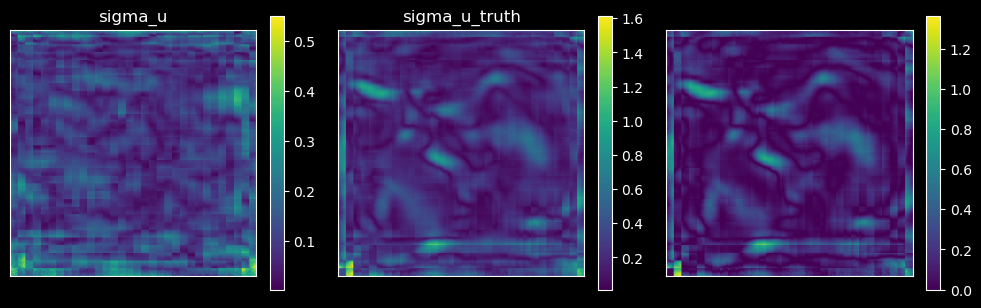

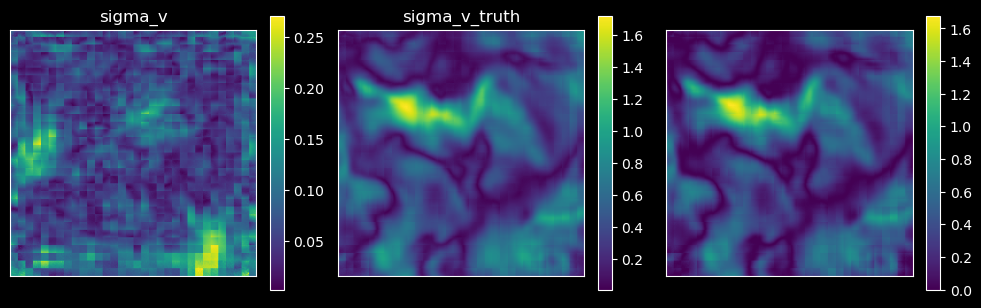

In [15]:
path = '/home/panding/code/UR/piv-data/baseline-multimodel/JHTDB_channel_01658.npy'
test = MultiModel(path)
sigma_u, sigma_v = test.std()
sigma_t_u, sigma_t_v = test.std_truth()

plt.figure(figsize=(12,12))

plt.subplot(131)
plt.title('sigma_u')
plt.imshow(sigma_u)
plt.xticks([])
plt.yticks([])
plt.colorbar(fraction=0.05)

plt.subplot(132)
plt.title('sigma_u_truth')
plt.imshow(sigma_t_u)
plt.xticks([])
plt.yticks([])
plt.colorbar(fraction=0.05)

plt.subplot(133)
plt.imshow(np.abs(sigma_u-sigma_t_u))
plt.xticks([])
plt.yticks([])
plt.colorbar(fraction=0.05)

plt.show()

plt.figure(figsize=(12,12))

plt.subplot(131)
plt.title('sigma_v')
plt.imshow(sigma_v)
plt.xticks([])
plt.yticks([])
plt.colorbar(fraction=0.05)

plt.subplot(132)
plt.title('sigma_v_truth')
plt.imshow(sigma_t_v)
plt.xticks([])
plt.yticks([])
plt.colorbar(fraction=0.05)

plt.subplot(133)
plt.imshow(np.abs(sigma_v-sigma_t_v))
plt.xticks([])
plt.yticks([])
plt.colorbar(fraction=0.05)

plt.show()
